Data Preprocessing

In [1]:
import pandas as pd
rain = pd.read_csv('../DataPreprocessing/ACC - Rain -Albert Park Acc rainfall_20220818-20230818.csv', parse_dates=['Timestamp'])
rain.head()

,Timestamp,UTC Offset,Multiple Gauge Rainfall Recency Alarm (on/off),Quality,Rainfall (mm),Quality.1,Rainfall (Accumulated) (mm),Quality.2
0,2022-08-18 14:20:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
1,2022-08-18 14:25:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
2,2022-08-18 14:30:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
3,2022-08-18 14:35:00,12,NaN,No data available,2.5,No quality or non-verified,2.5,Automated Process or Synthetic
4,2022-08-18 14:40:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic


In [2]:
moist = pd.read_csv('../DataPreprocessing/ACC - Soil Moisture - Mt Albert Grammar Rain_20220818-20230818_5mins.csv', parse_dates=['Timestamp'])
moist.head()

,Timestamp,UTC Offset,Soil Moisture Content (%V/V),Quality
0,2022-08-18 14:25:00,12,NaN,No data available
1,2022-08-18 14:30:00,12,52.1,No quality or non-verified
2,2022-08-18 14:35:00,12,NaN,No data available
3,2022-08-18 14:40:00,12,NaN,No data available
4,2022-08-18 14:45:00,12,52.1,No quality or non-verified


In [3]:
mtalbert = rain.merge(moist, on='Timestamp')
mtalbert.head()

,Timestamp,UTC Offset_x,Multiple Gauge Rainfall Recency Alarm (on/off),Quality_x,Rainfall (mm),Quality.1,Rainfall (Accumulated) (mm),Quality.2,UTC Offset_y,Soil Moisture Content (%V/V),Quality_y
0,2022-08-18 14:25:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic,12,NaN,No data available
1,2022-08-18 14:30:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic,12,52.1,No quality or non-verified
2,2022-08-18 14:35:00,12,NaN,No data available,2.5,No quality or non-verified,2.5,Automated Process or Synthetic,12,NaN,No data available
3,2022-08-18 14:40:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic,12,NaN,No data available
4,2022-08-18 14:45:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic,12,52.1,No quality or non-verified


In [4]:
mtalbert.drop(columns=['UTC Offset_x', 'Multiple Gauge Rainfall Recency Alarm (on/off)','Quality_x', 'Quality.1', 'Quality.2', 'UTC Offset_y', 'Quality_y'], inplace=True)
mtalbert.head()

,Timestamp,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
0,2022-08-18 14:25:00,NaN,0.0,NaN
1,2022-08-18 14:30:00,NaN,0.0,52.1
2,2022-08-18 14:35:00,2.5,2.5,NaN
3,2022-08-18 14:40:00,NaN,2.5,NaN
4,2022-08-18 14:45:00,NaN,2.5,52.1


In [5]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 2851 non-null    float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  34777 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [6]:
print(mtalbert.isnull().sum())


Timestamp                            0
Rainfall (mm)                   102303
Rainfall (Accumulated) (mm)          0
Soil Moisture Content (%V/V)     70377
dtype: int64


In [7]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 2851 non-null    float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  34777 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [8]:
print(mtalbert['Rainfall (mm)'].unique())


[ nan  2.5  0.5  1.   3.   1.5  2.   3.5  4.   5.   4.5  8.   6.   5.5
  7.5  6.5  9.  10.   8.5  9.5 11.5  7. ]


In [9]:
mtalbert['Soil Moisture Content (%V/V)'].isna().sum()

70377

In [10]:
# mtalbert['Rainfall (mm)'] = pd.to_numeric(mtalbert['Rainfall (mm)'], errors='coerce')
mtalbert['Rainfall (mm)'] = mtalbert['Rainfall (mm)'].fillna(0)


In [11]:
mtalbert['Soil Moisture Content (%V/V)'] = mtalbert['Soil Moisture Content (%V/V)'].interpolate(method='linear')
mtalbert.isna().sum()

Timestamp                       0
Rainfall (mm)                   0
Rainfall (Accumulated) (mm)     0
Soil Moisture Content (%V/V)    1
dtype: int64

In [12]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 105154 non-null  float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  105153 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [13]:
print(mtalbert['Rainfall (mm)'].head())


0    0.0
1    0.0
2    2.5
3    0.0
4    0.0
Name: Rainfall (mm), dtype: float64


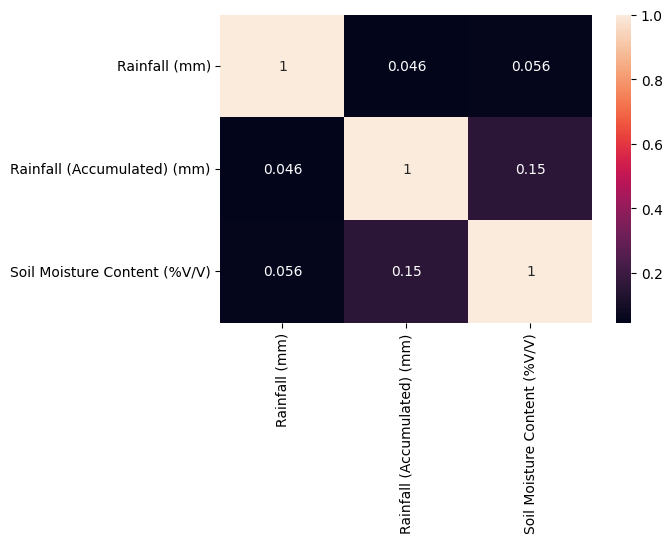

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Heatmap for correlation between variables
mtalbert = mtalbert.set_index('Timestamp')
# Select only the numeric columns from the 'weather' DataFrame
numeric_columns = mtalbert.select_dtypes(include=[np.number])

plt.figure(figsize=(6, 4))
sns.heatmap(mtalbert.corr(), annot=True)
plt.show()

<Axes: xlabel='Timestamp'>

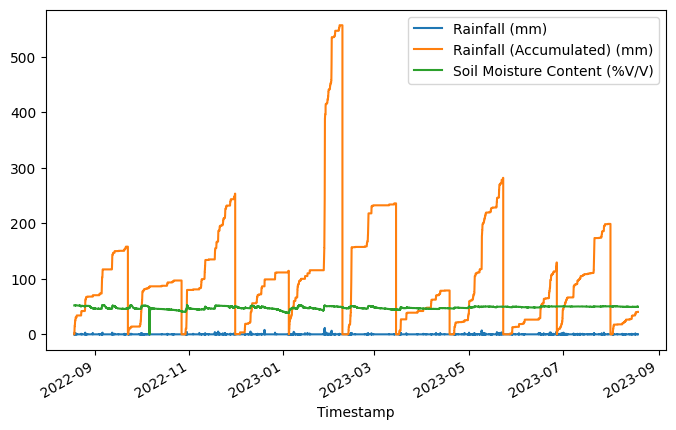

In [15]:
mtalbert.plot(figsize=(8, 5))

In [16]:
mtalbert.describe()

,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
count,105154.000000,105154.000000,105153.000000
mean,0.020408,104.130238,48.080293
std,0.184752,99.493476,2.552798
min,0.000000,0.000000,0.000000
25%,0.000000,34.000000,46.488000
50%,0.000000,84.500000,48.294000
75%,0.000000,135.000000,50.136000
max,11.500000,557.000000,52.805000


In [17]:
mtalbert.head(5)

,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
Timestamp,,,
2022-08-18 14:25:00,0.0,0.0,NaN
2022-08-18 14:30:00,0.0,0.0,52.1
2022-08-18 14:35:00,2.5,2.5,52.1
2022-08-18 14:40:00,0.0,2.5,52.1
2022-08-18 14:45:00,0.0,2.5,52.1


Lag Features

In [18]:
lag_size = 7

# Create lag features for 'Rainfall (mm)'
for i in range(1, lag_size + 1):
    mtalbert[f'Rainfall_lag_{i}'] = mtalbert['Rainfall (mm)'].shift(i)


# Create lag features for 'Soil Moisture Content (%V/V)'
for i in range(1, lag_size + 1):
    mtalbert[f'Soil_Moisture_lag_{i}'] = mtalbert['Soil Moisture Content (%V/V)'].shift(i)

mtalbert.dropna(inplace=True)  # Drop rows with NaN values in the lag features

Split Data

In [19]:
print(mtalbert.columns)


Index(['Rainfall (mm)', 'Rainfall (Accumulated) (mm)',
       'Soil Moisture Content (%V/V)', 'Rainfall_lag_1', 'Rainfall_lag_2',
       'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5', 'Rainfall_lag_6',
       'Rainfall_lag_7', 'Soil_Moisture_lag_1', 'Soil_Moisture_lag_2',
       'Soil_Moisture_lag_3', 'Soil_Moisture_lag_4', 'Soil_Moisture_lag_5',
       'Soil_Moisture_lag_6', 'Soil_Moisture_lag_7'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split

# Define features and target
X = mtalbert.drop(['Rainfall (mm)', 'Rainfall (Accumulated) (mm)', 'Soil Moisture Content (%V/V)'], axis=1)
y = mtalbert['Rainfall (mm)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM (assuming lag_size=3)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping


lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)


# Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = lstm_predictions.flatten()

f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0258 - val_loss: 0.0313
Epoch 2/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0220 - val_loss: 0.0306
Epoch 3/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0216 - val_loss: 0.0277
Epoch 4/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0209 - val_loss: 0.0304
Epoch 5/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0166 - val_loss: 0.0263
Epoch 6/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0184 - val_loss: 0.0259
Epoch 7/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0188 - val_loss: 0.0233
Epoch 8/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0176 - val_loss: 0.0223
Epoch 9/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0166 - val_loss: 0.0230
Epoch 10/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0189 - val_loss: 0.0271
Epoch 11/50
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0180 - val_loss: 0.0255
Epoch 12/50
2103/2103 ━━━━━━━

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions on the training set
train_lstm_predictions = lstm_model.predict(X_train_lstm)
train_lstm_predictions = train_lstm_predictions.flatten()

# Calculate evaluation metrics for the training set
train_rmse = sqrt(mean_squared_error(y_train, train_lstm_predictions))
train_mae = mean_absolute_error(y_train, train_lstm_predictions)
train_mse = mean_squared_error(y_train, train_lstm_predictions)
train_r2 = r2_score(y_train, train_lstm_predictions)

# Print metrics for the training set
print("Training Set - LSTM Root Mean Squared Error (RMSE):", train_rmse)
print("Training Set - LSTM Mean Absolute Error (MAE):", train_mae)
print("Training Set - LSTM Mean Squared Error (MSE):", train_mse)
print("Training Set - LSTM R2 Score:", train_r2)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, lstm_predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, lstm_predictions)

# Calculate MSE
mse = mean_squared_error(y_test, lstm_predictions)

# Calculate R2 score
r2 = r2_score(y_test, lstm_predictions)

# Print the metrics
print("LSTM Root Mean Squared Error (RMSE):", rmse)
print("LSTM Mean Absolute Error (MAE):", mae)
print("LSTM Mean Squared Error (MSE):", mse)
print("LSTM R2 Score:", r2)

2629/2629 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Training Set - LSTM Root Mean Squared Error (RMSE): 0.1301538430204159
Training Set - LSTM Mean Absolute Error (MAE): 0.021212647091197846
Training Set - LSTM Mean Squared Error (MSE): 0.01694002285298307
Training Set - LSTM R2 Score: 0.48774128843024755
LSTM Root Mean Squared Error (RMSE): 0.1441516507945381
LSTM Mean Absolute Error (MAE): 0.02208584895799458
LSTM Mean Squared Error (MSE): 0.020779698426790453
LSTM R2 Score: 0.45468813677222575


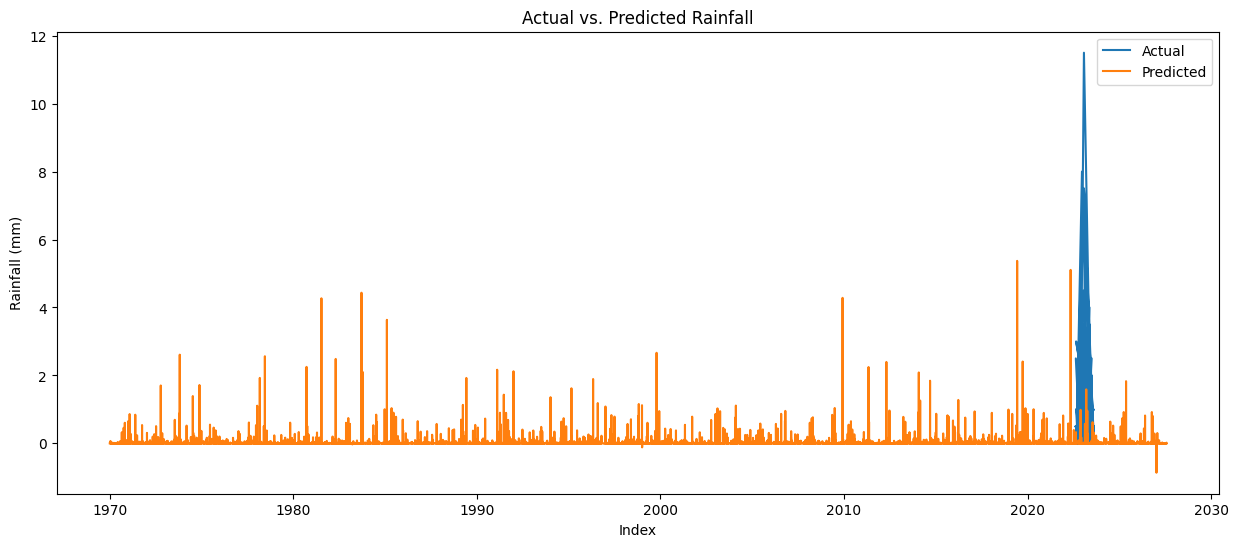

In [24]:
import matplotlib.pyplot as plt
# Plotting actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Index')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.savefig('./lstm_st_predict', dpi=300)
plt.show()


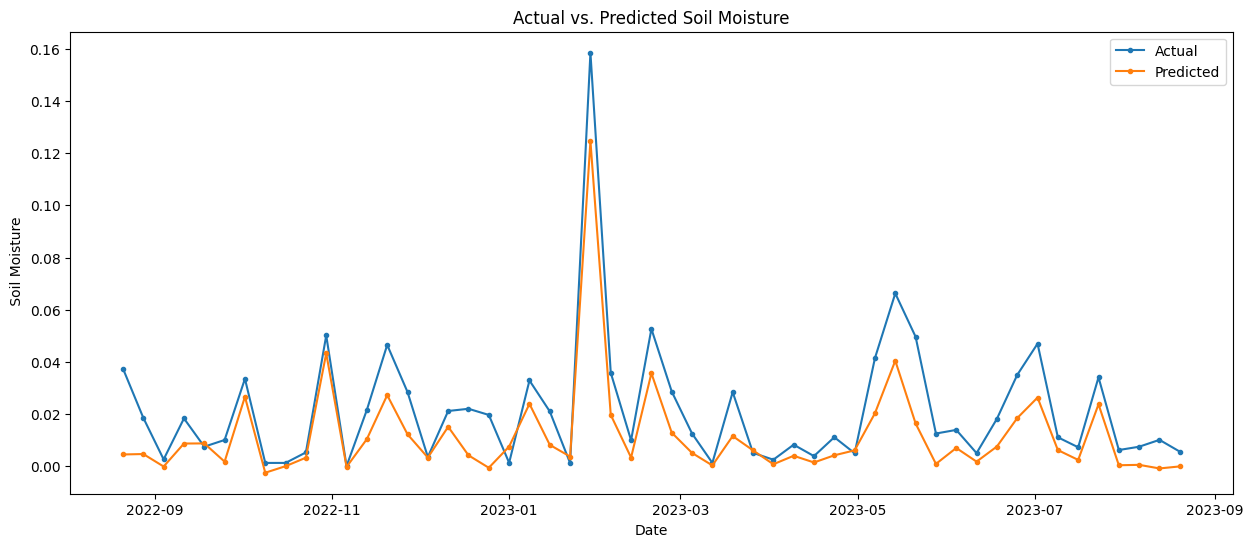

In [25]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': lstm_predictions}, index=X_test.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Soil Moisture')
ax.set_xlabel('Date')
ax.set_ylabel(' Soil Moisture')
ax.legend()
plt.savefig('rf_long_predict', dpi=300)

plt.show()